# Homework 7

The block below imports the necessary packages.

In [1]:
import numpy as np
import pandas as pd
import pylab as plt

## 1. Maximize the accuracy

Making use of what you have learned from this course so far, achieve an accuracy score of 0.85 on the test set. The training set and test set are provided for you.

In [2]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('perovskite_data.csv')

X_perov = df[['rA (Ang)', 'rB (Ang)']].values
y_perov = df['exp_label'].values

X_train, X_test, y_train, y_test = train_test_split(X_perov, y_perov, test_size = .4, random_state = 13)

In [3]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 8)
dt.fit(X_train, y_train)

print('Accuracy score on the test set: {}'.format(dt.score(X_test, y_test)))

Accuracy score on the test set: 0.8528138528138528


Create a 1 x 2 subplot where the x-axis is `rA (Ang)` and the y-axis is `rB (Ang)`. The left plot should be color-coded by the original label, while the right one should be color-coded by the predicted labels. (See M3T4L2 Slide #8)

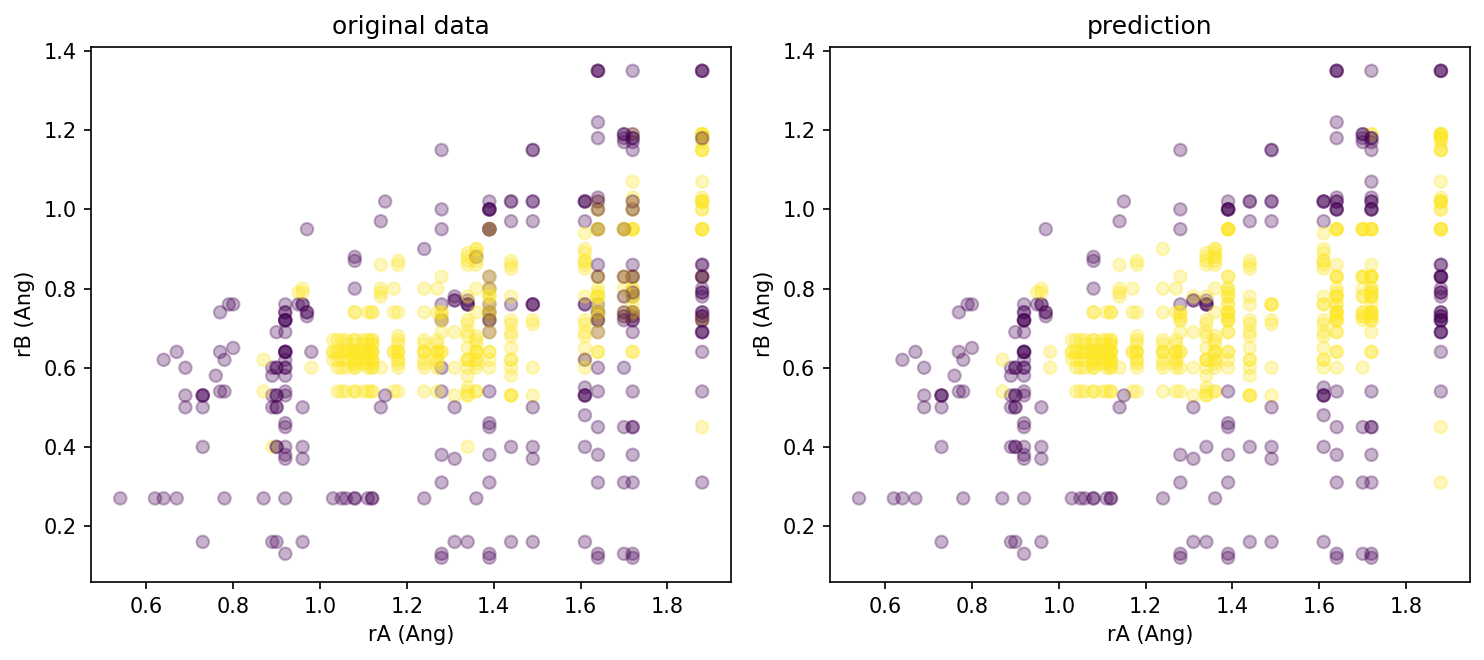

In [4]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4.5), dpi = 150)

axes[0].scatter(X_perov[:, 0], X_perov[:, 1], alpha = .3, c = y_perov)
axes[0].set_xlabel('rA (Ang)')
axes[0].set_ylabel('rB (Ang)')
axes[0].set_title('original data')

axes[1].scatter(X_perov[:, 0], X_perov[:, 1], alpha = .3, c = dt.predict(X_perov))
axes[1].set_xlabel('rA (Ang)')
axes[1].set_ylabel('rB (Ang)')
axes[1].set_title('prediction')

plt.tight_layout()

Plot the confustion matrix.

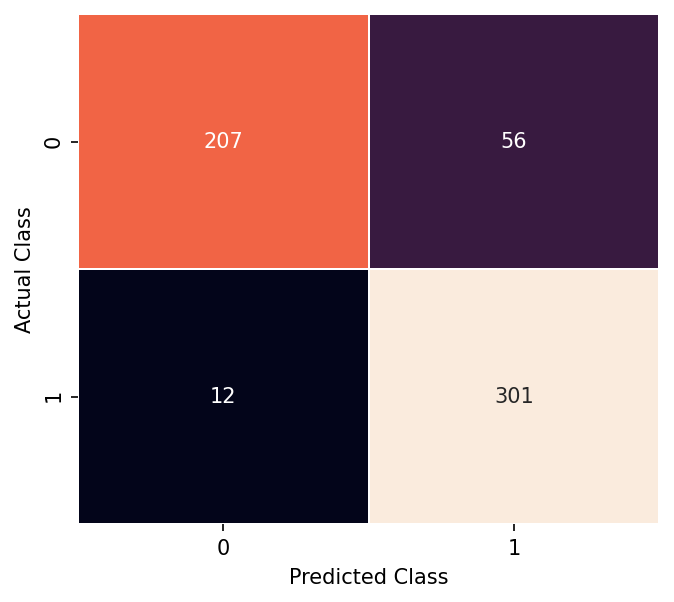

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_perov, dt.predict(X_perov))

fig, ax = plt.subplots(figsize = (5, 4.5), dpi = 150)
sns.heatmap(cm, annot = True, linewidth = .45, cbar = False, fmt = "d", annot_kws = {'va': 'center'})
ax.set_xlabel('Predicted Class')
ax.set_ylabel('Actual Class');

Briefly describe which algorithm you used, how you optimized hyperparameters, any feature transformation you tried (scaling or PCA), and resulting classification metrics.

## 2. k-Nearest Neighbors

Utilizing the same data set above, let's find the optimum `k` which is the number of neighbors considered in the kNN algorithm. With `k` ranging from 2 to 20, *(i)* train a `sklearn.neighbors.KNeighborsClassifier` model with the training set and *(ii)* plot the accuracy score on the training set as well as that on the test set with respect to the number of neighbors `k`.

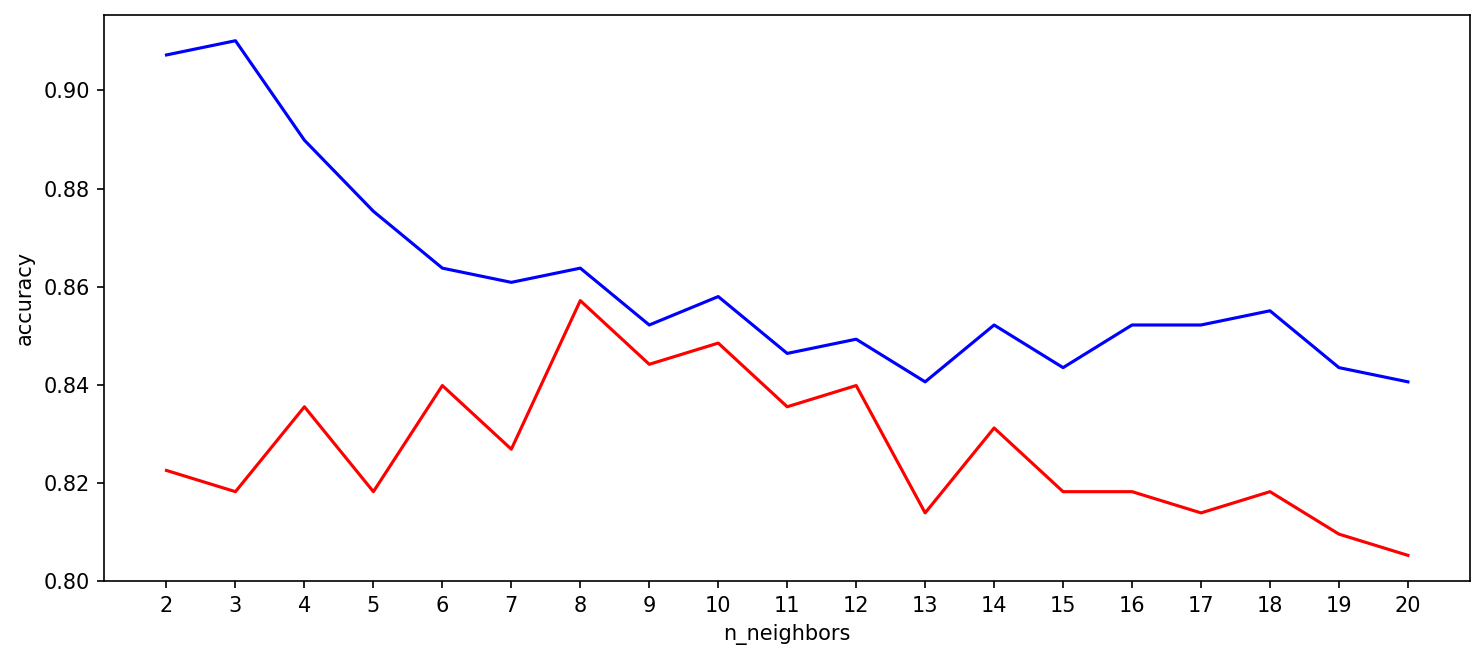

In [6]:
from sklearn.neighbors import KNeighborsClassifier

acc_train = []
acc_test = []

for i in range(2, 21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    acc_train.append(knn.score(X_train, y_train))
    acc_test.append(knn.score(X_test, y_test))
    
fig, ax = plt.subplots(figsize = (10, 4.5), dpi = 150)
ax.plot(range(2, 21), acc_train, 'b-', label = 'training score')
ax.plot(range(2, 21), acc_test, 'r-', label = 'test score')
ax.set_xlabel('n_neighbors')
ax.set_ylabel('accuracy')
ax.set_xticks(range(2, 21))

plt.tight_layout()

What would be the optimum `k`? Briefly explain.

**Answer**

The optimum `k` is 8 since it gives the highest accuracy score on the test set.

Calculate the accuracy of a 1-nearest neighbors model on the training set. A 1-NN model considers a point as its own nearest neighbors.

***Hint*** You can get the answer without coding.

**Answer**

The accuracy would be 1.

Will this be a reliable indicator of its accuracy on the testing data? Briefly explain your answer.

**Answer**

It is definitely not a reliable model. The 1-NN model will just memorize the training set which will cause obvious over-fitting.